# Dataset analysis

## Content

There are 13 attributes

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
14. condition: 0 = no disease, 1 = disease


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path = "../project/data/raw/dataset.csv"

In [9]:
data = pd.read_csv(path)
total_objects = data.shape[0]
print(f"shape of dataset: {data.shape}")

shape of dataset: (297, 14)


In [6]:
features = [x for x in data.columns]
mean_age = np.mean(data.age)
total_disease = np.sum(data.condition)

In [11]:
print("features:")
for f in features:
    print(f)
print(f"mean age: {mean_age}")
print(f"total disease: {total_disease} of {total_objects} objects")

features:
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
condition
mean age: 54.54208754208754
total disease: 137 of 297 objects


In [15]:
print("Description of the dataset:")
display(data.describe())

Description of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


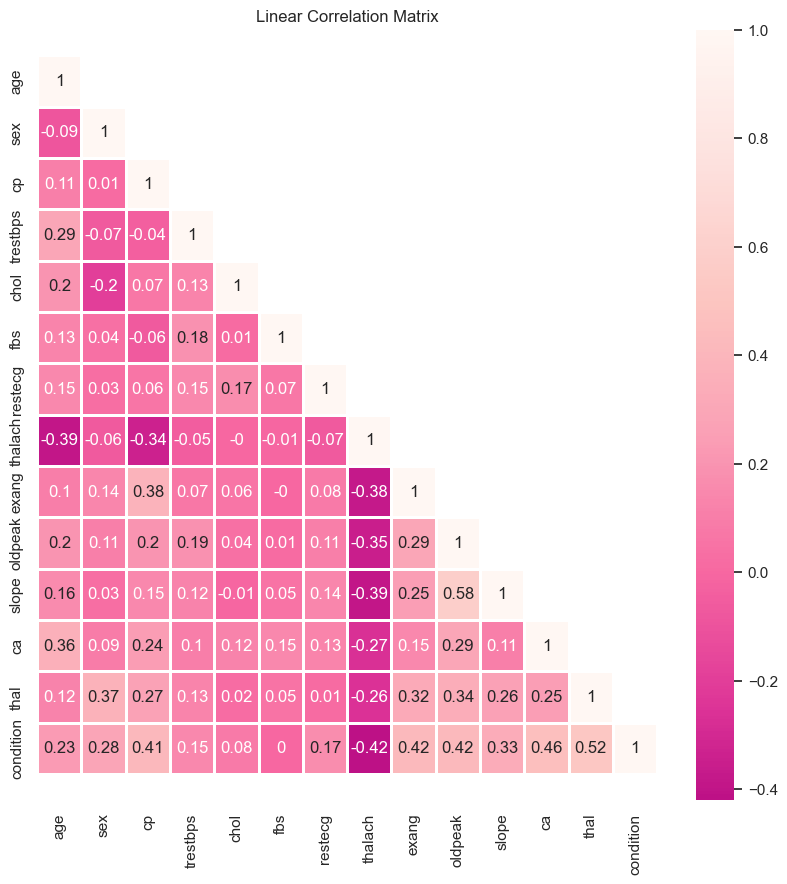

In [75]:
def corrMat(data, id=False):
    
    corr_mat = data.corr().round(2)
    fig, axes = plt.subplots(figsize=(10,10))
    mask = np.triu(np.ones_like(corr_mat, dtype=np.bool_))
    for i in range(mask.shape[0]):
        mask[i,i] = False
    sns.set(style='whitegrid')
    sns.heatmap(corr_mat,center=0,mask=mask,
                cmap='RdPu_r',lw=2,annot=True,cbar=True)
    bottom, top = axes.get_ylim() 
    axes.set_ylim(bottom + 0.5, top - 0.5) 
    axes.set_title('Linear Correlation Matrix')
    return corr_mat
    
corr_mat = corrMat(data)

In [76]:
print(corr_mat)

            age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
age        1.00 -0.09  0.11      0.29  0.20  0.13     0.15    -0.39   0.10   
sex       -0.09  1.00  0.01     -0.07 -0.20  0.04     0.03    -0.06   0.14   
cp         0.11  0.01  1.00     -0.04  0.07 -0.06     0.06    -0.34   0.38   
trestbps   0.29 -0.07 -0.04      1.00  0.13  0.18     0.15    -0.05   0.07   
chol       0.20 -0.20  0.07      0.13  1.00  0.01     0.17    -0.00   0.06   
fbs        0.13  0.04 -0.06      0.18  0.01  1.00     0.07    -0.01  -0.00   
restecg    0.15  0.03  0.06      0.15  0.17  0.07     1.00    -0.07   0.08   
thalach   -0.39 -0.06 -0.34     -0.05 -0.00 -0.01    -0.07     1.00  -0.38   
exang      0.10  0.14  0.38      0.07  0.06 -0.00     0.08    -0.38   1.00   
oldpeak    0.20  0.11  0.20      0.19  0.04  0.01     0.11    -0.35   0.29   
slope      0.16  0.03  0.15      0.12 -0.01  0.05     0.14    -0.39   0.25   
ca         0.36  0.09  0.24      0.10  0.12  0.15     0.13    -0